# Биоразнообразие vs DHI: разведочный анализ

Цель документа -- визуализировать зависимости между биоразнообразием и DHI, найти типичные шаблоны в пространственном размещении.

## Первый взгляд на данные

Данные хранятся в файле `DATA/wwf_globe_all_biomes.csv`, прочитаем его:

In [2]:
points = read.table('DATA/wwf_globe_all_biomes.csv', header = TRUE, sep=",")

### Описательная статистика:

Получим краткую сводку по содержанию столбцов (минимум, 1-й квартиль, медиана, среднее, 3-й квартиль и максимум):

In [3]:
summary(points)

       X                 Y                CID          AMPHIBIANS    
 Min.   :-179.87   Min.   :-80.809   Min.   :    1   Min.   :  0.00  
 1st Qu.: -60.87   1st Qu.:  8.928   1st Qu.: 7501   1st Qu.:  1.00  
 Median :  27.52   Median : 39.265   Median :15000   Median :  4.00  
 Mean   :  17.76   Mean   : 32.100   Mean   :15000   Mean   : 13.48  
 3rd Qu.:  89.66   3rd Qu.: 59.231   3rd Qu.:22500   3rd Qu.: 13.00  
 Max.   : 179.69   Max.   : 83.505   Max.   :30000   Max.   :255.00  
   BIRDS_glob        MAMMTERR_g       REPTILES_g        majority_l    
 Min.   :    0.0   Min.   :  0.00   Min.   :  0.000   Min.   :  0.00  
 1st Qu.:   89.0   1st Qu.: 24.00   1st Qu.:  0.000   1st Qu.:  7.00  
 Median :  163.0   Median : 39.00   Median :  4.000   Median : 10.00  
 Mean   :  956.1   Mean   : 51.94   Mean   :  9.912   Mean   : 32.34  
 3rd Qu.:  242.0   3rd Qu.: 60.00   3rd Qu.: 12.000   3rd Qu.: 15.00  
 Max.   :65535.0   Max.   :255.00   Max.   :128.000   Max.   :255.00  
   dhi_fpar1 

Гистограмма одного из распределений биоразнообразия -- наземные млекопитающие:

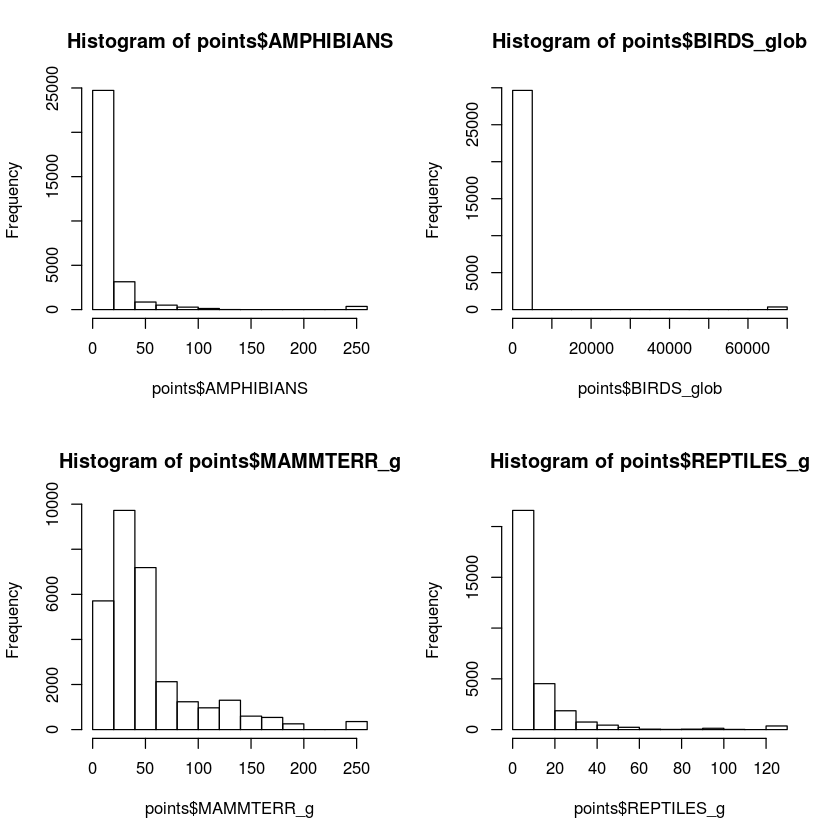

In [5]:
par(mfrow=c(2,2))
hist(points$AMPHIBIANS)
hist(points$BIRDS_glob)
hist(points$MAMMTERR_g)
hist(points$REPTILES_g)

### Описание столбцов с данными.

**Общая информация:**

Каждая строка таблицы (запись) представляет собой одну точку на поверхности Земли в которой были замеряны определенные параметры. Всего имеется 30 тысяч точек.

 * CID: Идентификатор записи.
 * X: Долгота.
 * Y: Широта.
 
**Биоразнообразие:**

 * AMPHIBIANS: Показатель, характеризующий биоразнообразие амфибий. Изменяется в диапазоне 0 до 255 (см. примечание ниже).
 * BIRDS_glob: Показатель, характеризующий биоразнообразие птиц. Изменяется в диапазоне 0 до 65535 (см. примечание ниже).
 * MAMMTERR_g: Показатель, характеризующий биоразнообразие наземных млекопитающих. Изменяется в диапазоне 0 до 255 (см. примечание ниже).
 * REPTILES_g: Показатель, характеризующий биоразнообразие рептилий. Изменяется в диапазоне 0 до 255 (см. примечание ниже).
 
 
 * majority_l: Закодированы биомы, но непонятно, что. Изменяется в диапазоне 0 до 255.
 
**Показатели продуктивности:**

Данные DHI -- специальные индексы, основанные на показателе продуктивности FPAR (Fraction of Absorbed Photosynthetically Active radiation) -- это доля солнечного излучения, поглощенного растительной биомассой, измеряется в процентах.

 * dhi_fpar1: DHI для FPAR. Куммулятивная продуктивность: рассчитывается суммированием FPAR за год (интеграл). *Непонятно, почему у нее могут быть отрицательные значения (см. минимум).*
 * dhi_fpar2: DHI для FPAR. Минимальная продуктивность: минимальное значение FPAR за год. *Непонятно, почему у нее могут быть отрицательные значения (см. минимум).*
 * dhi_fpar3: DHI для FPAR. Сезонность: расчитывается как отношение стандартного отклонения FPAR к его среднему значению (за год). Таким образом большая величина dhi_fpar3 означает большое колебание продутивности в течении года. *Непонятно, почему у нее могут быть отрицательные значения (см. минимум).*
 
Продуктивность по LAI (Leaf Area Index) -- доля поверхности Земли, закрытой листвой, очень близкий к FPAR параметр.

 * dhi_lai8*: DHI для LAI. Аналогично FPAR.
 
*Примечание 1.* Возможно, что для показателей биоразнобразия используется специальный маркер "нет данных": 255 для амфибий, млекопитающих, 65535 для птиц и 128 для рептилий. Гистограммы распределений подтверждают эту гипотезу: обычно такое "максимальное" значение стоит на гистограмме особняком. Более того, во всех колонках количество таких значений одинаково (357). При дальнейшем анализе будем считать эти значения за маркеры остутствия информации. 
 
*Примечание 2.* Аналогично значение -1 для DHI будем считать маркером отсутствующих данных.
 
*Примечание 3.* Не очень понятно, было ли произведено сглаживание данных перед рассчетом DHI.

In [8]:
points$AMPHIBIANS[points$AMPHIBIANS==255] = NA
points$BIRDS_glob[points$BIRDS_glob==65535] = NA
points$MAMMTERR_g[points$MAMMTERR_g==255] = NA
points$REPTILES_g[points$REPTILES_g==128] = NA

points$dhi_fpar1[points$dhi_fpar1==-1] = NA
points$dhi_fpar2[points$dhi_fpar2==-1] = NA
points$dhi_fpar3[points$dhi_fpar3==-1] = NA

summary(points)

       X                 Y                CID          AMPHIBIANS    
 Min.   :-179.87   Min.   :-80.809   Min.   :    1   Min.   :  0.00  
 1st Qu.: -60.87   1st Qu.:  8.928   1st Qu.: 7501   1st Qu.:  1.00  
 Median :  27.52   Median : 39.265   Median :15000   Median :  4.00  
 Mean   :  17.76   Mean   : 32.100   Mean   :15000   Mean   : 10.57  
 3rd Qu.:  89.66   3rd Qu.: 59.231   3rd Qu.:22500   3rd Qu.: 12.00  
 Max.   : 179.69   Max.   : 83.505   Max.   :30000   Max.   :131.00  
                                                     NA's   :357     
   BIRDS_glob      MAMMTERR_g      REPTILES_g       majority_l    
 Min.   :  0.0   Min.   :  0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 88.0   1st Qu.: 24.0   1st Qu.:  0.00   1st Qu.:  7.00  
 Median :161.0   Median : 39.0   Median :  4.00   Median : 10.00  
 Mean   :178.4   Mean   : 49.5   Mean   :  8.49   Mean   : 32.34  
 3rd Qu.:236.0   3rd Qu.: 59.0   3rd Qu.: 11.00   3rd Qu.: 15.00  
 Max.   :611.0   Max.   :200.0   Max. 

Выбросим данные, которые не будут использоваться в анализе: `no-data` (восстановление остутствующих данных отдельная тема), `dhi_lai8*` (для начала поработаем с одним индексом), `majority_l` (не понятно, что это такое).

In [9]:
points = points[c("CID", "X", "Y", "AMPHIBIANS", "BIRDS_glob", "MAMMTERR_g", "REPTILES_g", "dhi_fpar1", "dhi_fpar2", "dhi_fpar3")]
points = na.omit(points)

# Число оставшихся точек:
length(points$X)

[1] 23269

## Исследование структуры данных

Построим гистограммы распределения биоразнообразий на очищенных данных:

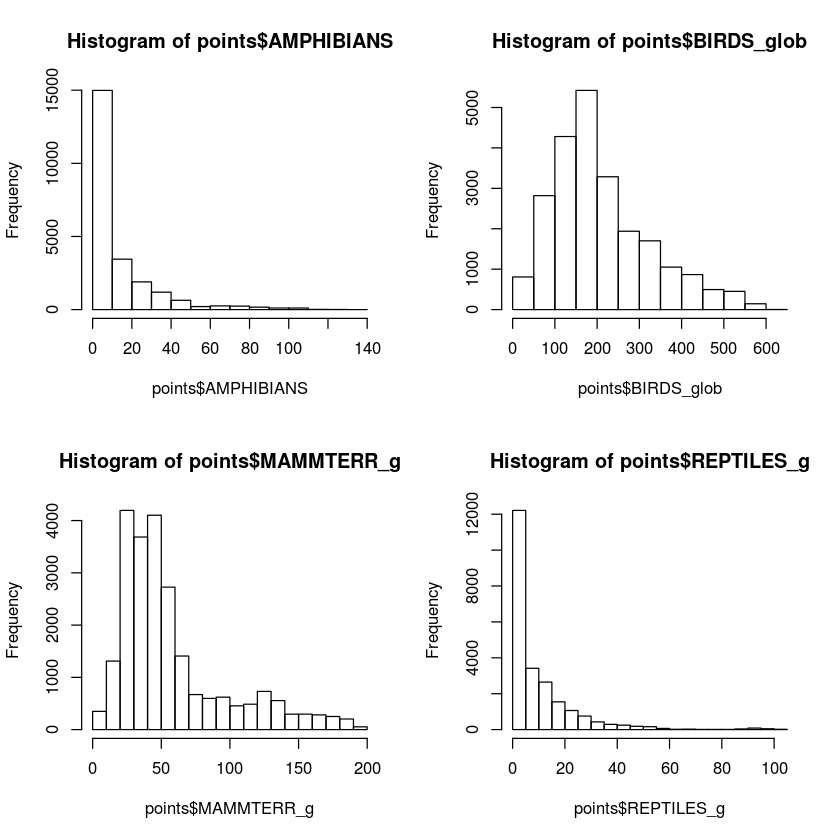

In [10]:
par(mfrow=c(2,2))
hist(points$AMPHIBIANS)
hist(points$BIRDS_glob)
hist(points$MAMMTERR_g)
hist(points$REPTILES_g)

### Совместное распределение, корреляции

Итак, у нас есть набор точек, лежащих в 7-ми мерном пространстве, система координат которого состоит из семи осей: "AMPHIBIANS", "BIRDS_glob", "MAMMTERR_g", "REPTILES_g", "dhi_fpar1", "dhi_fpar2", "dhi_fpar3" (географические координаты пока не учитываем, возможно, введем их в анализ позднее). 

In [6]:
# Небольшая выборка данных, для удобства работы. Используется для быстрой оценки, чтобы не ждать 
# результатов работы на большой выборке
pdata = points[c("AMPHIBIANS", "BIRDS_glob", "MAMMTERR_g", "REPTILES_g", "dhi_fpar1", "dhi_fpar2", "dhi_fpar3")]
psample_ind = sample(1:length(pdata[, 1]), size=1000)
psample = points[psample_ind, ]

Построим графики взаимного расположения точек.

In [11]:
png("img/all_vars.png", width=728, height=728, units="px")
 pairs(~AMPHIBIANS+BIRDS_glob+MAMMTERR_g+REPTILES_g+dhi_fpar1+dhi_fpar2+dhi_fpar3, 
       data=points, pch = 19, cex=0.01, main="Scatterplot Matrix")
dev.off()

png 
  2

<img src="https://176.9.38.120/cruncher/files/DHI/img/all_vars.png">

Первое, что бросается в глаза при изучении графиков -- очень тесная связь в биоразнообразии птиц и млекопитающих. Да и прочие графики для этих переменных почти одинаковые. Поэтому, если возникнет необходимость сокращать размерность задачи, то можно будет оставить только одну из этих переменных.

Есть зависимость биоразнообразия от DHI-2 (минимальной продуктивности): чем она больше, тем больше биоразнообразие. Но при этом в данных очень большой разброс вокруг некой усредненой кривой этой связи. Поэтому для объяснения поведения данных нужно привлекать еще какую-то переменную помимо минимальной продуктивности.

Очень странное поведение в биоразнообразии рептилий: довольно много точек с низким биоразнообразием и высоким, при этом почти не встречаются точки, в которых их биоразнообразие чуть выше среднего -- на графиках присуствуют явная "дыра" при биоразнообразии 60-80 пунктов. Непонятно, что это означает, возможно даже, что это проблема сбора данных или методики расчета биоразнообразия. (*Нужно это проверить, прежде, чем доверять выводам по рептилиям*). Ну и вообще, гистограмма распределения биоразнообразия рептилий (см. `hist(points$REPTILES_g)` в сравнении с другими) отличается от распределения биоразнобразия остальных видов -- у рептилий провал в середине гистограммы. Интересно было бы понять причины такого поведения, действительно ли рептилии "любят" крайности -- их или густо или пусто.

Интересно, что хотя минимальная продуктивность тесно связана с куммулятивной, связь эта не прямая: бывают области, в которых высокая минимальная продуктивность соседствует с малой куммулятивной. (Есть несколько точек где наоборот).

Интересна форма зависимости (треугольная) между DHI-1 (куммулятивной продуктивности) и биоразнообразием. Аналогичная форма зависимости у DHI-3 (сезонность) и переменными биоразнообразия. Что мы видим? При низкой куммулятивной продуктивности биоразнообразие мало (что логично -- если жрать нечего, то жрать и некому). При этом при высокой куммулятивной продуктивности биоразнообразие может быть как очень большим, так и очень малым (да вообще любым). Т.е. при высокой куммулятивной продуктивности начинают появляться какие-то другие определяющие факторы. То же самое с сезонностью: чем сильнее выражена сезонность, тем ниже биоразнообразие (логично -- сложнее приспособиться); при слабовыраженной сезонности биоразнообразие может изменяться в очень широких пределах. Тут возможно несколько объяснений такого поведения:
 * С ростом продуктивности (падением сезонности) биоразнообразие растет, но растет также и "амплитуда колебаний" - чем больше биоразнообразие, тем больше отклонение от среднего. В этом случае стоит подумать о преобразовании переменных (взятии логарифма, возведении в квадрат и т.п.), чтобы нивелировать возрастание амплитуды.
 * Это может объясняься взаимодействием между разными переменными, поэтому нужно анализировать не пары переменных, а всю совокупность.

### Исследование структуры данных

Попробуем визуализировать данные методом [самоорганизующихся карт Кохонена](https://goo.gl/oc7YRl). Это позволит подробнее взглянуть на структуру и зависимости переменных.

Самоорганизующуюся карту можно представить себе в виде скомканной резиновой сетки (по типу волейбольной), брошенной в облако рассматриваемых точек в пространстве переменных "AMPHIBIANS", "BIRDS_glob", "MAMMTERR_g", "REPTILES_g", "dhi_fpar1", "dhi_fpar2", "dhi_fpar3". Затем запускается процедура настройки: в ходе настройки сетка распрямляется и накрывает облако точек. При правильном обучении каждый узел сетки оказывается в локальном сгущении точек. Так, например, если облако точек имеет цилиндрическую форму, то сетка после (правильной!) настройки должна распрямиться и повторить форму цилиндра. Потом для каждой точки ищется ближайший узел сетки. Поскольку точки лежат в 7-ми мерном пространстве, то у каждого узла сетки будут семимерные координаты и эти координаты -- усредненные координаты ближайших к узлу сетки точек. Таким образом каждый узел будет описывать свойства своих соседей из облака точек (т.е. по сути узел сетки - это центр кластера в локальной области 7-ми мерного пространства). Соответственно мы сводим задачу изучения свойств облака из тысяч точек к задаче изучения свойств узлов сетки. 

Затем сетка извлекается в "наше" трехмерное пространство и растягивается на мониторе. Изучая характеристики узлов сетки, мы получаем информацию о многомерном облаке точек. Количество узлов сетки -- регулятор детальности: чем больше узлов, тем детальнее мы видим картину (но тем и сложнее в ней разобраться), чем меньше узлов, тем более грубое приближение мы получаем (но легче заметить глобальные закономерности).

#### Строим карту Кохонена

In [9]:
# Подключкаем библиотеку
library("kohonen")

Loading required package: class
Loading required package: MASS


Нормируем данные, чтобы все переменные вносили приблизительно равный вклад в результат. Биоразнообразие птиц -- до 600 единиц, dhi3 -- десятые доли единиц, если не нормировать, то основной вклад в вариативность данных внесут птицы. Поэтому приведем каждую переменную к нулевому среднему и единичной дисперсии и будем анализировать уже преобразованные переменные.

In [10]:
pdata.sc = scale(pdata)
psample.sc = pdata.sc[psample_ind, ]

Важно знать правильное соотношение сторон сетки, которое зависит от геометрии облака точек - в идеале между узлами обученной сети хорошо бы иметь равные расстояния, чтобы узлы были равноправны. Поэтому определим относительные размеры сетки (отношение ширины к высоте). Для этого по-грубому оценим форму облака точек, спроецировав его на плоскость. Для этого используем отображение Сэммона: https://en.wikipedia.org/wiki/Sammon_mapping

Initial stress        : 0.04838
stress after  10 iters: 0.03405, magic = 0.092
stress after  20 iters: 0.02649, magic = 0.213
stress after  28 iters: 0.02281


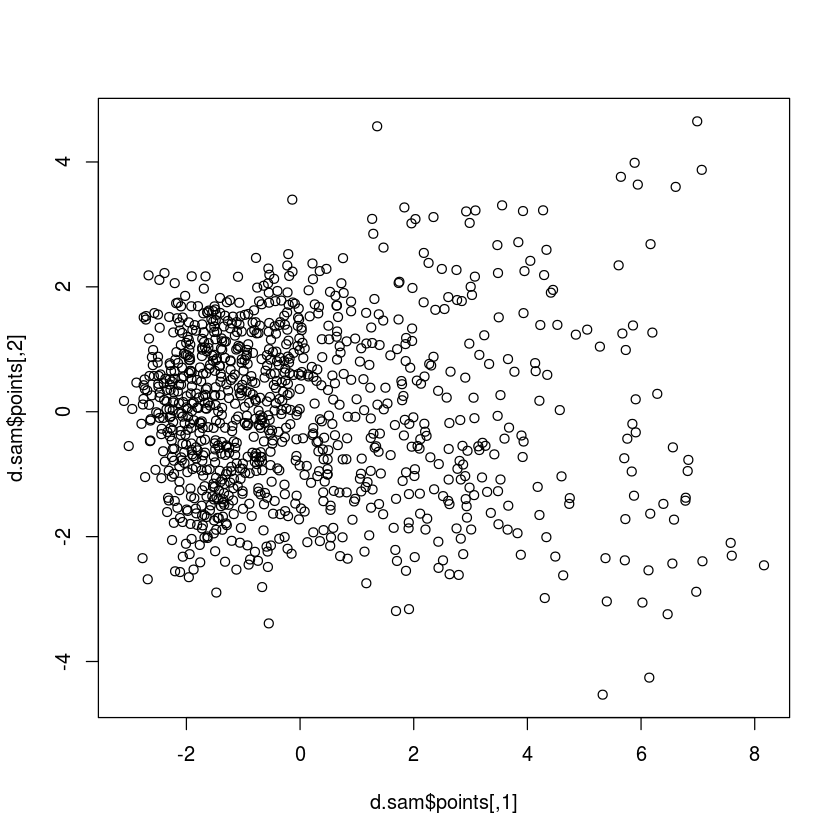

In [11]:
d.u = unique(psample.sc)
d.matr = dist(d.u)
d.sam = sammon(d.matr)
plot(d.sam$points)

Видим, что проекция выборки точек на плоскость занимает (грубо) 10 условных единиц, а по высоте около 8. Делаем вывод, что ширина должна быть незначительно больше, чем высота. Тем не менее, не рекомендуется делать квадратные сетки, поскольку они очень плохо позиционируются в пространстве -- из-за своей симметричной форме позиционирование становится неустойчивым. Поэтому сетку сделаем чуть более вытяннутой, чем нужно.

Число узлов сети возмем 28 (4 строки и 7 столбцов), этот размер подобран "на вскидку" -- если сделать больше узлов, то уже сложно разобраться.

Построим сеть:

In [12]:
row = 4
col = 7

seed = 111      # Для того, чтобы можно было воспроизвести результаты, 
set.seed(seed)  # установим начальное значение для генератора случайных чисел

grd = somgrid(col, row, "hexagonal")

d.som = som(data = as.matrix(pdata.sc), 
            grid = grd, 
            rlen=5000
)

summary(d.som)

som map of size 7x4 with a hexagonal topology.
Training data included; dimension is 23269 by 7
Mean distance to the closest unit in the map: 0.786555


#### Строим графики полученных карт.

(если смотреть графики в отдельном окне, то они выглядят крупнее)

In [13]:
png("img/som.png", width=2048, height=1024, units="px")
 plot(d.som)
dev.off()

png 
  2

<img src="https://176.9.38.120/cruncher/files/DHI/img/som.png">

#### Как читать карту

Большие круги -- это узлы сетки. Внутри узла нарисованы лепестки, которые отражают характеристики узла (что означает цвет лепестка см. в легенде). Например, верхний левый узел имеет большие лепестки зелоного и желтого цвета, которые отвечают за значения биоразнообразия амфибий, птиц и животных соответственно. При этом у этого узла отсутсвует серовато-бежевый лепесток, который отвечает за сезонность. Таким образом делаем вывод, что этот узел попал в ту область точек пространства, которая характеризуется высоким биоразнообразием и низкой сезонностью. Таким образом каждый узел сетки представляет собой определенный класс объектов.

Построим график числа точек, которые лежат в районе узлов сетки:

In [14]:
png("img/som_count.png", width=2048, height=1024, units="px")
  plot(d.som, type='count')
dev.off()

png 
  2

<img src="https://176.9.38.120/cruncher/files/DHI/img/som_count.png">

На графике видно, что, например, около левого верхнего узла (красный цвет) расположено приблизительно 300 точек (т.е. для 300 точек из всей совокупности этот узел сети будет ближайшим, для других точек ближайшими будут какие-то другие узлы). Около правого верхнего узла по грубой оценке - 1700 точек. Таким образом можно оценить приблизительную численность представителей каждого класса.

Построим график среднего расстояния от точек, связанных с узлом сети, до этого узла:

In [15]:
png("img/som_distance.png", width=2048, height=1024, units="px")
  plot(d.som, type='quality')
dev.off()

png 
  2

<img src="https://176.9.38.120/cruncher/files/DHI/img/som_distance.png">

Эта карта дает нам разброс точек вокруг узлов сети. Видим, к примеру, что для среднее растояние для трехсот точек, соседствующих с верхним левым узлом - где-то 1.0-1.2 единиц (нормированных -- см. замечание выше про нормирование данных). Т.е. это довольно среднее расстояние и точки лежат вокруг этого узла довольно плотно. Еще теснее точки лежат вокруг верхнего правого узла, т.е. он отражает их свойства несколько лучше. И, наконец самый разбросанный класс - белого цвета, среднее расстояние от точек этого класса до узла 2.7.

#### Беглый обзор карты Кохонена

Рассмотрим карту Кохонена.

Как видим, на построенной карте видны определенные закономерности. Например, в левом верхнем углу находятся узлы сети, которые лежат в области точек с высокими значениями биоразнообразия всех, кроме рептилий. Биоразнообразие рептилий отражено в узлах, лежащих чуть ниже. В правой части сети находятся узлы, лежащие в области точек с высокой сезонностью (нижняя правая часть) или с низкими значениями всех переменных.

Видим также, что сезонность идет в противофазе с продуктивностями: высокая сезонность обычно означает низкую куммулятивную и минимальную продуктивности (что, в общем довольно логично).

Из карты видно, что высокое значение сезонности отрицательно влияет на все виды биоразнообразия (в узлах с высокой сезонностью оно очень низко). Правда, этот факт мы уже знаем из парных графиков. Также мы видим, что высокое значение куммулятивной продуктивности и минимальной продуктивности еще не означает автоматически высогого биоразнообразия: верняя строка показывает примеры узлов, с высокими занчениями продуктивности, но очень различными значениями биоразнообразия. Средние и низкие значения продуктивностей обычно связаны со средними значениями биоразнообразия.

Кроме того, в третьем узле слева нижней строки мы видим пример того, что биоразнообразие птиц и млекопитающих может быть выше среднего не смотря на низкие значения всех трех DHI (может быть как раз благодаря относительно низкой сезонности? -- легче приспособиться?).

Интересно, что биоразнообразие рептилий обычно идет в разрез с биоразнообразием остальных видов (но вообще по рептилиям какие-то странные данные, с ними нужно разбираться).

Вообще из графика складывается впечатление, что основным фактором, описывающим разнообразие, является сезонность.

#### Экспорт результатов для представления на карте

Экспортируем результаты и посмотрим их на карте. Т.е. для каждой точки из исходной таблицы мы пропишем номер класса, в который она попала, и сохраним в новый файл.

Вспомогательные функции, переводят номер класса в номер строки и столбца:

In [16]:
rnum = function(i, row, col){
    1 + (i-1) %/% col
}
cnum = function(i, row, col){
    x = (i %% col)
    if (x == 0)
        col
    else
        x
}
        
row.nums = sapply(d.som$unit.classif, rnum, row=4, col=8)
col.nums = sapply(d.som$unit.classif, cnum, row=4, col=8)

Экспорт результатов:

In [17]:
result = points

result$class = d.som$unit.classif
result$row = row.nums
result$col = col.nums

write.csv('classification.csv', x=result)

Результат классификации был экспортирован сюда: http://kolesov.nextgis.com/resource/84/display. Подпись к точкам - это номер класса, который был ей присвоен. Я постарался сделать так, чтобы цвет точки отражал номер класса, но результат не очень. Лучше верить надписи, чем цвету.

### Анализ полученных классов в географическом пространстве

До сих пор мы рассматривали точки оторвано от их местоположения и выводили классы по свойствам точек. Настало время положить точки на карту и посмотреть, образуют ли они какие-то логичные шаблоны размещения или нет. Если да -- то это будет служить косвенным подтверждением правильности построенной карты и можно будет изучать закономерности.

Откроем экспортированные точки в ГИС, чтобы было видно их пространственное расположение и проанализируем, как распределены классы по поверхности Земли.

Если открыть точки так, чтобы на карте умещалась вся Земля, то видно, что точки раскрашены не хаотично, а показывают определенные закономерности. Например, выделяются пятна в Центральной Африке, Бассейне Амазонки, Индонезии, Австралии. Если увеличить масштаб, то видны однородные горизонтальные "полосы" точек южнее Сахары, Дальнем Востоке, Южной Сибири, Канаде. Вертикальные полосы видны вдоль горных массивов Южной и Северной Америк, закономерности видны также в Африке и Индонезии.

Откроем для примера некоторые из этих "пятен" и посмотрим подробнее, какие классы там расположены и какими характеристиками обладают эти классы.

(В одной из вкладок удобно открыть [карту природных зон Земли](http://geography7.wdfiles.com/local--files/bioms/map024.jpg).)

Для удобства работы, чтобы не листать блокнот, скопирую сюда полученную карту Кохонена. И запишу номера классов узлов карты (номера полученных классов). Нумерация классов идет слева направо сверху вниз, т.е. левый нижний угол карты Кохонена имеет номер 1, а правый верхний - 28.

```
 22    23    24    25    26    27    28
    15    16    17    18    19    20    21
 8      9    10    11    12    13    14
    1      2     3    4      5     6     7
```

<img src="https://176.9.38.120/cruncher/files/DHI/img/som.png">

#### Пустыни и полупустыни.

*Центральная Австралия.* Видим, что в центральной части континента преобладает класс номер 28. Также встречается класс номер 27, хотя и несколько реже. 

*Юго-западная Африка (западная часть Намбии).* Преобладающий класс 28, встречается класс 27 и (реже) 20.

*Сахара и Аравийский полуостров.* На большую часть этих территорий данных нет. Там же, где встречаются точки -- класс 28.

Итак, в пустыни попадают класс 28, 27, 20. Эти классы характеризуются низкими значениями всех трех компонент DHI (у класса 20 средняя интентсивность сезонности и низкие продуктивности). Биоразнообразие видов или отсутствует (класс 28), или очень низок (классы 27, 20).

#### Саванны и редколесья

*Саванны Африки.* В Африке два пояса саванн: 
 * пояс, проходящий южнее Сахары, содержит классы номер 5, 6, 7 (на границе пустынь - 20, 27, 28);
 * пояс, лежащий в северной части ЮАР, восточной части Намбии содержит классы 20, 27, 5.
 
*Индостан.* Большая часть Индостана (за ислкючением западного побережья и северо-восточных районов) лежит в этом поясе. Преимущественный класс - 5. Содержатся также классы 4, 11, 17, 19.

*Центральная часть Бразилии.* Классы 11, 17, 3, 9.

*Северо-Восточная часть Автралии.* Классы 28, 27, 6.

Итак, саваны и редколесья представлены большим числом классов, чем пустыни. Это классы 3, 4, 5, 6, 7, 11, 17, 19, а также классы, встречаемые в пустынях: 28, 27, 20.

Классы 3--7 лежат на нижней строке карты Кохонена. Классы 5--7 характеризуются высокой сезонностью и довольно низким биоразнообразием. Класс 11 характеризуется низкой сезонностью со средними продуктивностями и средним биоразнообразием птиц и млекопитающих. Классы 17 и 19 схожи между собой, характеризуются биоразнообразием несколько ниже среднего и значениями всех компонент DHI также ниже среднего.

#### Влажные экваториальные леса

*Центральная Африка.* Представлен основным классом -- 24. В западной части (на побережье) -- классом 2. Очень редко встречаются классы 23 и 16.

*Бассейн Амазонки.* Представлен классами 22, 23, на границах зон - 2 и 16.

*Индонезия.* Почти исключительно класс номер 8.

Классы 23 и 24 характеризуются очень высокой продуктивностью (куммулятивной и минимальной) и отсутствующей сезонностью. При этом у класса 24 биоразнообразие млекопитающих и птиц выше среднего, а у 23 -- очень высокое. Биоразнообразие рептилий почти отсутствует. Класс 16 очень близок к классу 23, отличается меньшим разнообразием амфибий. Класс номер два характеризуется высоким биоразнообразием при средней минимальной продуктивности, достаточно высокой куммулятивной продуктивности и отсутствующей сезонности. Класс номер 8 -- очень высокое разнообразие рептилий, продуктивности выше среднего и средние показатели разнообразия птиц и млекопитающих.

#### Хвойные леса

*Западная Сибирь.* Характеризуется сочетанием классов 18, 12, 13 приблизительно в равных пропорциях, иногда -- класс 6.

*Север США, юг Канады.* Преобладание классов 10, 12, 18, иногда - 7.

Классы 12, 13, 18 характеризуются низким биоразнообразием при пониженной продуктивности и средневыраженной сезонности. Класс 10 -- низкое биоразнообразие при средней куммулятивной продкутивности и пониженной минимальной продуктивности, слабой сезонности. Класс 7 -- очень высокая сезонность и очень низкое биоразнообразие.

### Предварительный вывод

На взятых на вскидку природных зонах не не нашел противоречия в содержащихся там классах: во-первых, эти зоны довольно однородны по классовому составу, а во-вторых свойства самих классов смотрятся довольно логично для этих зон. Поэтому предварительно примем, что карта Кохонена отражает реальность и выделенные ею классы действительно можно увидеть в природе.

Пойдем дальше и попробуем по карте Кохонена найти основные закономерности в данных и их размещении.

Попробуем сформулировать словесно замеченные связи между значениями DHI и биоразнообразием. Ранее было замечено, что:

 * Если область характеризуется большой сезонностью -- биоразнообразия там не будет.
 * Если область характеризуется малой куммулятивной продуктивностью -- биоразнообразия там не будет.

Как мы видели ранее, большая куммулятивная продуктивность и малая сезонность еще не означают автоматически высокого биоразнообразия, как хотелось бы думать. Посмотрим, почему.

Найдем класс, который отличается высокой куммулятивной продуктивностью, малой сезонностью и малым биоразнообразием. Это класс номер 25. Посмотрим, где он расположен на карте: http://kolesov.nextgis.com/resource/84/display?base=osm-mapnik&lon=163.8281&lat=-23.2413&angle=0&zoom=4&styles=85. Оказывается, что основная часть точек расположена в восточной части Индонезии, Новой Зеландии, южной части Австралии с Тасманией. Помимо этого они встречаются также в южной части Японии, Шри-Ланке, юге Южной Америки, Мадагаскаре, западном побережье Северной Америки. Отдельные точки можно найти на Кубе, востоке США и Канады, Европе и Африке. Предполагая, что отдельные точки погоды не делают и возможно объясняются ошибками классификации, будем анализировать массивы этих точек.

Итак, Новая Зеландия, Австралия и Тасмания. Довольно специфические страны с точки зрения живности -- всякие сумчатые, яйцекладущие и т.п. Да еще понаехавшие кролики. Возможно, там и на самом деле малое биоразнообразие? До других мест далеко, а свои наполовину повымерли? 

Укладывается ли в эту схему Индонезия, причем не вся, а именно восточная (на западе преимущетсвенно восьмой класс -- тоже малое биоразнообразие млекопитающих и птиц, зато хорошо с рептилиями)? Маловероятно, там недалеко до материка, как минимум птицы должны долетать.

Чили: 25-й класс перемешивается с 18-м и 13-м, эти классы немного похожи на 25-й, отличаются меньшей интенсивностью продуктивности. Но зато Чили страна горная, отделенная высокими хребтами от восточной части материка, а на западе -море. В труднодоступных областях запросто может оказаться невысокое биоразнобразие. Такая же картина на западном побережье США, севернее Сан-Франциско.

Предварительная гипотеза: высокая продуктивность не приводит к высокому биоразнообразию в труднодоступных районах. (Но что делать с Индонезией, Японией и Мадагаскаром? Опа! Это те части, в которых есть горы). Возможно труднодоступность района можно измерить просто высотой над уровнем моря. Итак, нужно проверить гипотезу: *если куммулятивная и минимальная продуктивность высока и это горный район, то биоразнобразие низко*.

Вопрос: почему тогда в Индокитае не встречается 25-й класс? В Индокитае в основном пятнадцатый класс (похож на 25-й, но чуть выше биоразнообразие и первый (очень низкая минимальная продуктивность и средняя куммулятивная). Опа! Похоже на то, что данные по DHI не были пропущены через фильтры и я работаю с "сырыми" рядами FPAR.

**Действительно, выяснилось, что я работал с "сырыми" данными. В [следующем](https://176.9.38.120/cruncher/notebooks/DHI/DHI_biodiversity_Phase2.ipynb) документе производятся все те же операции, но на отфильтрованных рядах fpar**.
 